# Sales Analysis

## Import Necessary Libraries

In [55]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

## Merge the 12 months of sales data into a sigle CSV file

In [56]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv('all_data.csv', index = False)


## Reading data

In [57]:
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Data cleaning

In [58]:
df.shape

(186850, 6)

In [59]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [60]:
#df.dropna(['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address'], axis = 0, inplace = True)
df.dropna(how = 'all',inplace = True)

In [61]:
df.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [62]:
df.shape

(186305, 6)

## Question 1: What was the best month for sales? How much was earned that month?

In [63]:
df.loc[df['Order Date'].str.contains('^or',flags = re.I, regex = True)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [64]:
df = df.loc[~df['Order Date'].str.contains('^or',flags = re.I, regex = True)]

In [65]:
# Adding Month column
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [66]:
def get_month(x):
    return x.month
    
df['Month'] = df['Order Date'].map(get_month)

In [67]:
# Convert Str into Int
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [68]:
# Adding Sales column
df['Sales'] = df['Quantity Ordered']*df['Price Each']

In [70]:
df.groupby('Month').sum()['Sales']

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

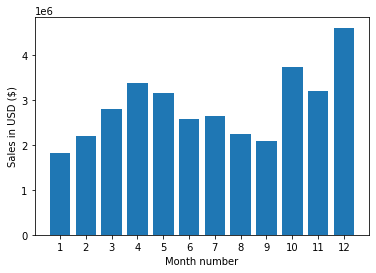

In [71]:
months = range(1,13)
plt.bar(months,df.groupby('Month').sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

## Question 2: What city had the highest number of sales?

In [72]:
def get_city(x):
    return x.split(',')[1]
def get_states(x):
    return x.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_states(x)})")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [73]:
df.groupby('City').sum()['Sales']

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

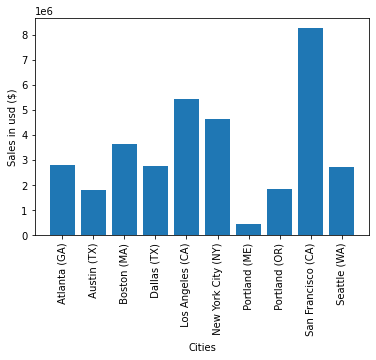

In [46]:
cities = [city for city, df in df.groupby('City')]

plt.bar(cities, df.groupby('City').sum()['Sales'])
plt.xlabel('Cities')
plt.ylabel('Sales in usd ($)')
plt.xticks(rotation = 90)
plt.show()

### Question 3: What time should we display adversetisments to maxmize likelihood of customer's buying product?

In [47]:
df['Hour'] = df['Order Date'].dt.hour

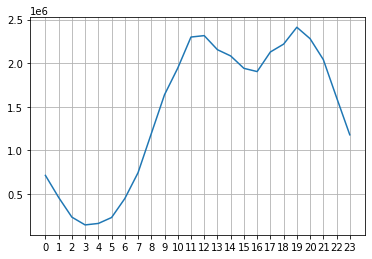

In [54]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby('Hour').sum()['Sales'])
plt.xticks(hours)
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

In [83]:
dup_id = df[df['Order ID'].duplicated(keep = False)]

In [91]:
dup_id['grouped'] = dup_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
dup_id = dup_id[['Order ID','grouped']].drop_duplicates()

In [99]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup_id['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the best?

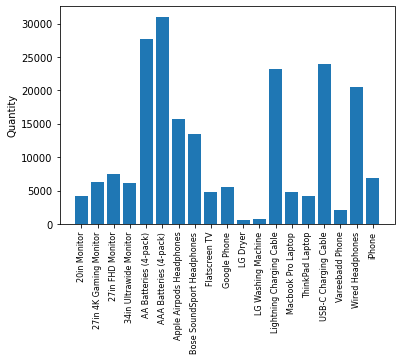

In [111]:
product_quantity = df.groupby('Product').sum()['Quantity Ordered']
product_name = [name for name, df in df.groupby('Product')]

plt.bar(product_name, product_quantity)
plt.xticks(rotation = 90, size = 8)
plt.ylabel('Quantity')
plt.show()

In [112]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


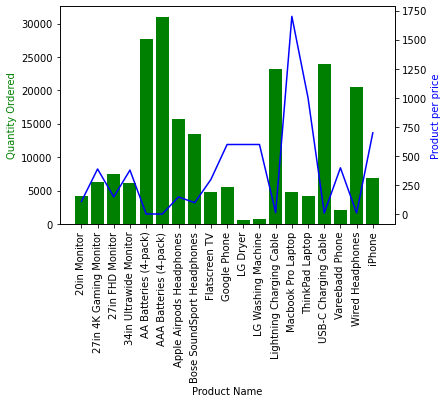

In [114]:
prices = df.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(product_name,product_quantity, color = 'g')
ax2.plot(product_name, prices, color = 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Product per price', color = 'b')
ax1.set_xticklabels(product_name, rotation = 90)

fig.show()